## Import the libraries

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import integrate
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MultipleLocator
from scipy.stats import linregress
from sklearn.metrics import r2_score

## Data Loading

In [2]:
# Read the las files containing required log data and create a dataframe.

las1=lasio.read(r"D:\AGP\THESIS\For python\Calliance-1_Suite1_Run1_PEX-HRLA-APS_Splice.las")
las2=lasio.read(r"D:\AGP\THESIS\For python\Calliance-1_S1R2_FMI-DSI-HNGS_174PUP.las")

df1=las1.df().reset_index()
df2=las2.df().reset_index()

In [3]:
df1.head()

DEPT    APLC  DI_HRLT    DNPH  DSOZ    GDEV       GR    HCAL    HDRA  \
0  3207.2580  0.1621   8.6922  0.0332   0.0  5.2031  26.3047  8.6695  1.5842   
1  3207.4104  0.1573   8.6922  0.0332   0.0  5.3195  25.2139  8.6770  1.5842   
2  3207.5628  0.1611   8.6922  0.0327   0.0  5.2381  25.7627  8.6922  1.5842   
3  3207.7152  0.1729   8.6922  0.0324   0.0  5.1414  26.8948  8.6922  1.5842   
4  3207.8676  0.1756   8.6808  0.0329   0.0  4.9147  28.5688  8.6808  1.5842   

     HPRA  ...    RLA4    RLA5  RM_HRLT    RXOZ        SP    TENS    TNPH  \
0 -1.8959  ...  0.0044  0.0067   0.0062  0.2035 -311.7500  5362.0  0.1865   
1 -1.8959  ...  0.0044  0.0067   0.0062  0.1688 -311.3750  5326.0  0.1865   
2 -1.8959  ...  0.0044  0.0067   0.0062  0.1153 -313.6875  5401.0  0.1840   
3 -1.8959  ...  0.0044  0.0066   0.0062  0.0652 -315.5625  5562.0  0.1819   
4 -1.8959  ...  0.0045  0.0067   0.0062  0.0763 -315.1250  5514.0  0.1843   

     NPOR     ECGR  RT_HRLT  
0  0.1757  28.5640   0.0067  
1  0.1757  27.3925   0.0067  
2  0.1915  28.0155   0.0067  
3  0.1837  29.2465   0.0066  
4  0.1804  31.0447   0.0067  

[5 rows x 25 columns]

In [4]:
df2.head()

DEPT   BS    TENS    DEVI    ANOR      FNOR     HAZI        RB  \
0  3237.2808  8.5  4471.0  1.1118  9.7735  131.2228  91.7673  213.2514   
1  3237.4332  8.5  4457.0  1.1118  9.7735  131.2228  91.7673  213.2514   
2  3237.5856  8.5  4492.0  1.1118  9.7735  131.2228  91.7673  213.2514   
3  3237.7380  8.5  4474.0  1.1118  9.7735  131.2228  91.7673  213.2514   
4  3237.8904  8.5  4465.0  1.1118  9.7735  131.2228  91.7673  213.2514   

      ITT     DTCO  ...    HCGR     HTPR    HTUR    HUPR       CDF      IHV  \
0  0.2339  58.7263  ...  6.4417  17.3289  3.4658 -0.7444  6486.668  34.6840   
1  0.2339  58.7263  ...  6.4417  17.3289  3.4658 -0.7444  6488.250  34.6826   
2  0.2339  58.7263  ...  6.4417  17.3289  3.4658 -0.7444  6488.250  34.6812   
3  0.2339  58.7263  ...  6.4417  17.3289  3.4658 -0.7444  6483.506  34.6798   
4  0.2339  58.7263  ...  6.4417  17.3289  3.4658 -0.7444  6486.668  34.6784   

       ICV      C1      C2      AZ  
0  34.6840  4.3572  4.1783  9.7662  
1  34.6826  4.3572  4.1783  9.7729  
2  34.6812  4.3572  4.1870  9.7766  
3  34.6798  4.3572  4.1783  9.7590  
4  34.6784  4.3572  4.1608  9.7744  

[5 rows x 29 columns]

In [5]:
# Slice the data frame to your zone of interest
data1= df1[(df1['DEPT'] >= 3726.5) & (df1['DEPT'] <=4152.5)]
data2= df2[(df2['DEPT'] >= 3726.5) & (df2['DEPT'] <=4152.5)]

In [6]:
# Select the required data from the available log columns and merge it to a single dataframe for easy handling 

data1_selected = data1[['DEPT', 'GR', 'HCAL', 'RHOZ', 'SP', 'NPOR', 'RT_HRLT', 'RM_HRLT', 'PEFZ', 'RXOZ']]
data2_selected = data2[['DEPT', 'BS', 'C1', 'C2', 'DTCO', 'DTSM', 'VPVS', 'DEVI','HSGR','HCGR']]

data = pd.merge(data1_selected, data2_selected, on='DEPT', how='inner')
data.columns

Index(['DEPT', 'GR', 'HCAL', 'RHOZ', 'SP', 'NPOR', 'RT_HRLT', 'RM_HRLT',
       'PEFZ', 'RXOZ', 'BS', 'C1', 'C2', 'DTCO', 'DTSM', 'VPVS', 'DEVI',
       'HSGR', 'HCGR'],
      dtype='object')

In [7]:
# Rename the data columns to conventional terms

data = data.rename(columns={
    'DEPT': 'DEPTH',
    'HCAL': 'CAL',
    'RHOZ': 'RHOB',
    'NPOR': 'NPHI',
    'RT_HRLT': 'RESD',
    'RM_HRLT': 'RES_MUD',
    'PEFZ': 'PE',
    'RXOZ': 'RESS',
})

data.columns


Index(['DEPTH', 'GR', 'CAL', 'RHOB', 'SP', 'NPHI', 'RESD', 'RES_MUD', 'PE',
       'RESS', 'BS', 'C1', 'C2', 'DTCO', 'DTSM', 'VPVS', 'DEVI', 'HSGR',
       'HCGR'],
      dtype='object')

In [41]:
# Create another dataframe for the remaining calculations
logs = pd.DataFrame(data[['DEPTH','GR', 'RHOB', 'DTCO', 'DTSM', 'NPHI', 'PE','RESD']])

## Quality control

Text(0.5, 1.02, 'QC of Basic Logs')

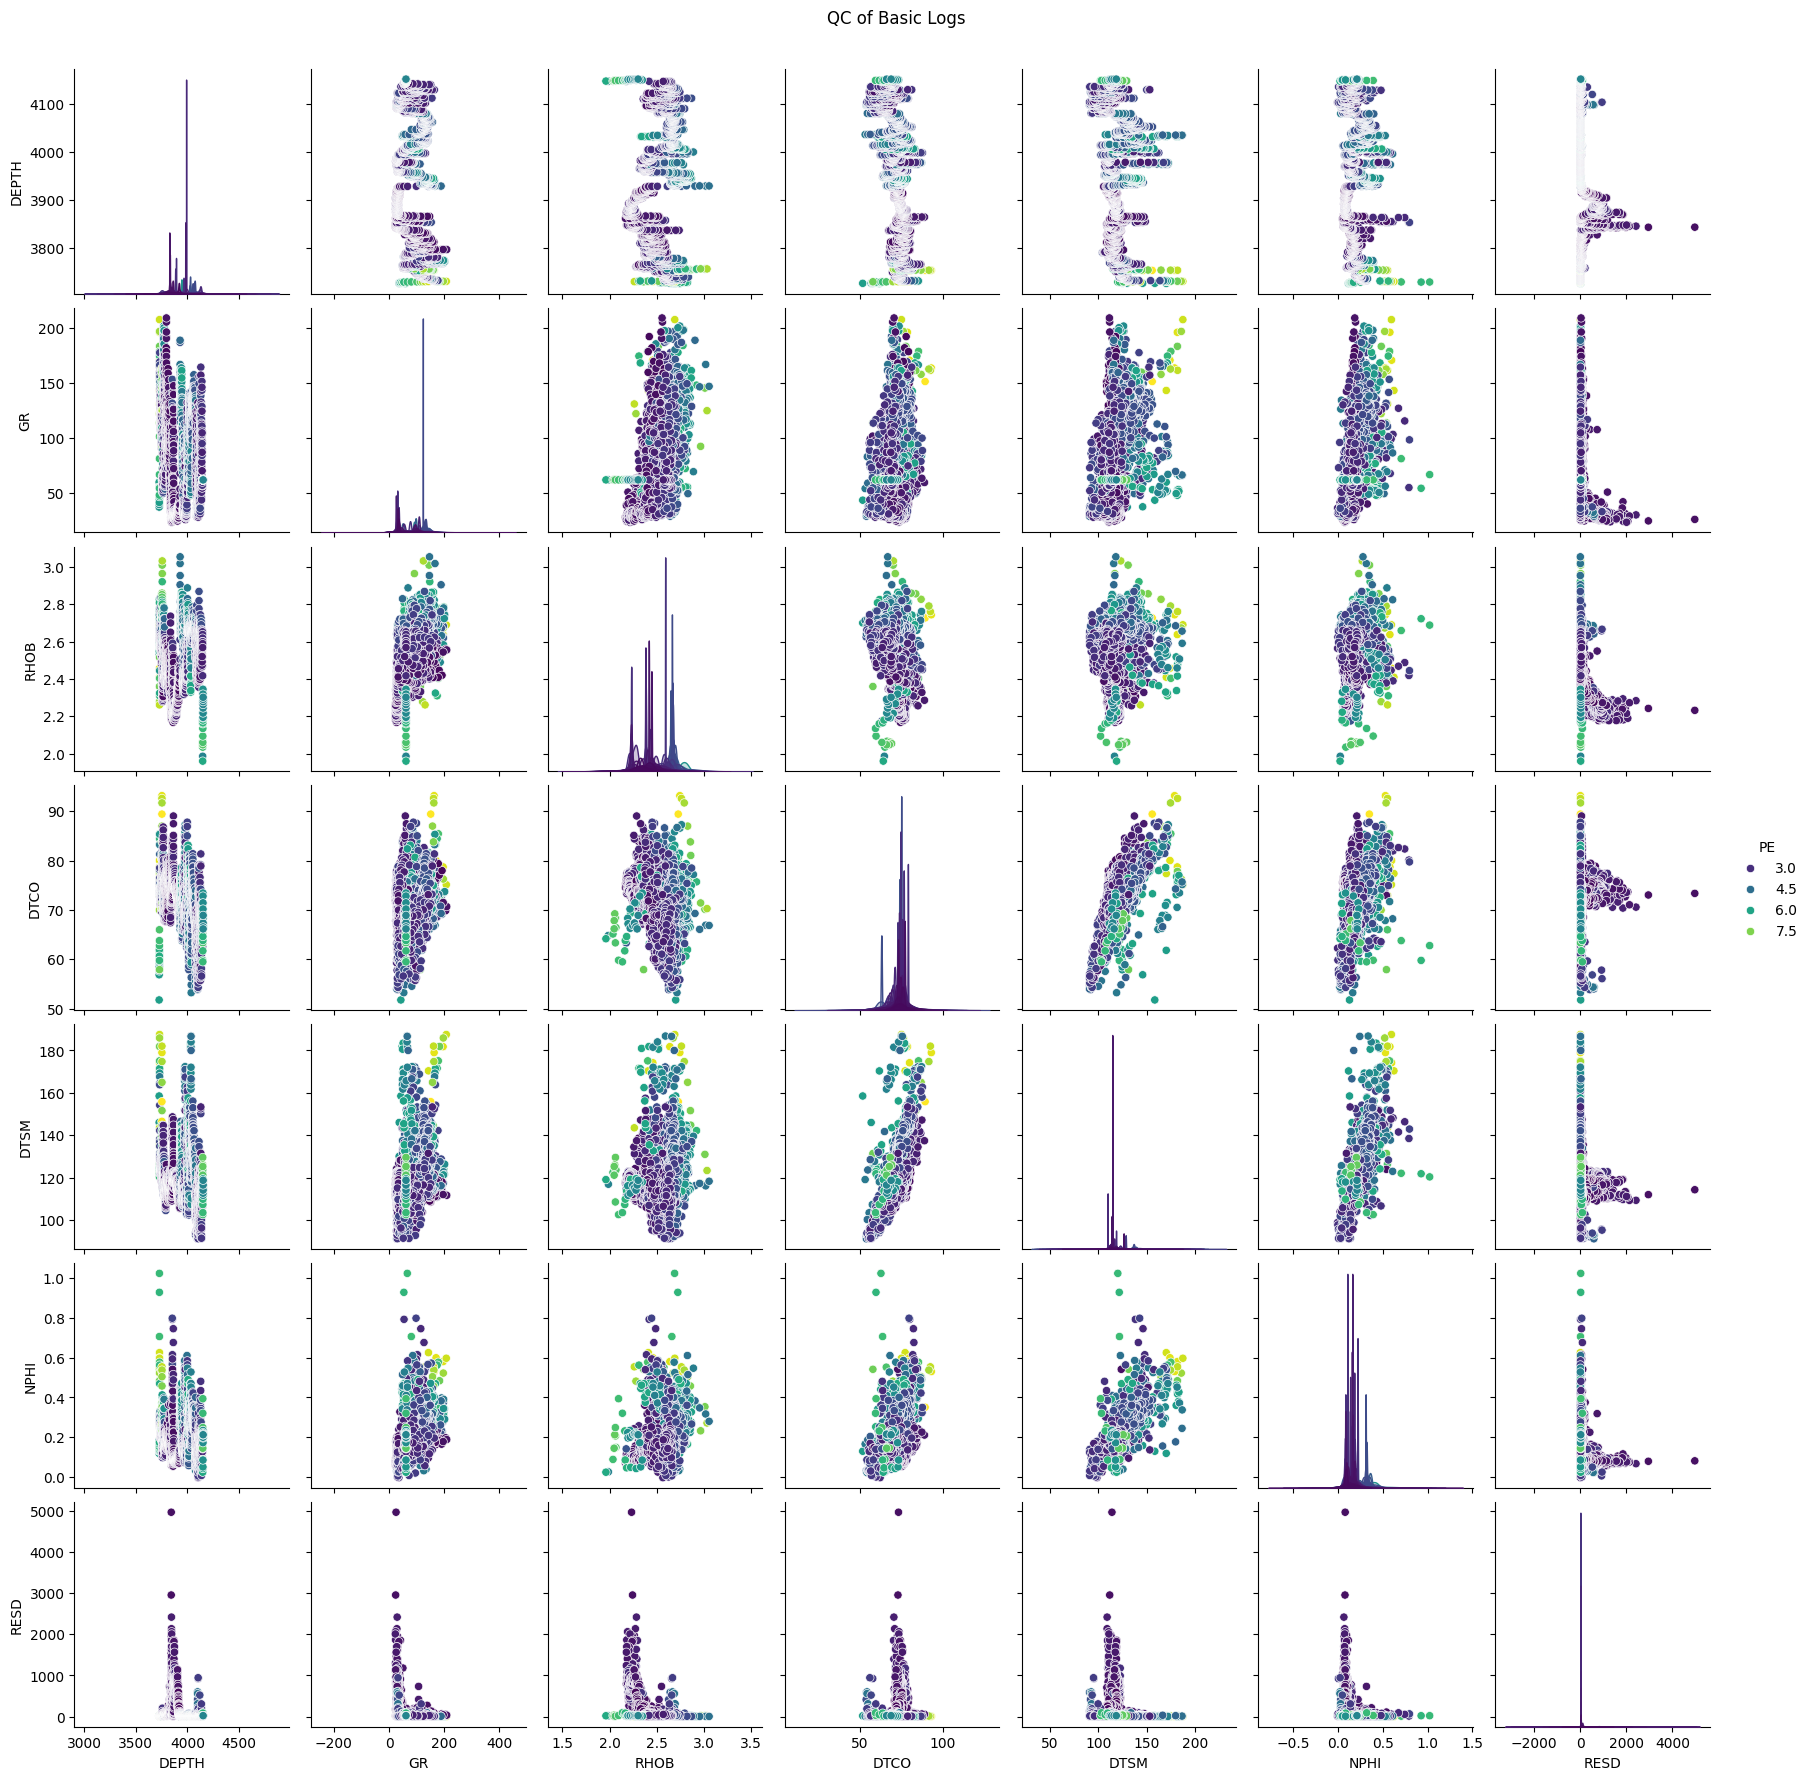

In [42]:
# Pair plot for data quality control
pair_plot=sns.pairplot(logs,hue='PE',palette='viridis')
pair_plot.fig.suptitle('QC of Basic Logs', y=1.02)

# Remove outliers if present

## Basic Logs Visualization

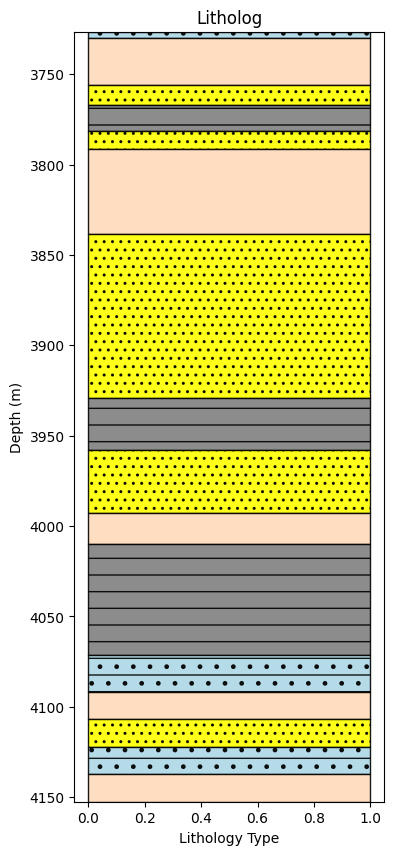

In [9]:
# Define Lithilog
# litholog

color_dict = {
      'limestone1': 'lightblue',
      'siltstone2': 'peachpuff',
      'sandstone1': 'yellow',
      'claystone2': 'grey',
      'sandstone2': 'yellow',
      'siltstone3': 'peachpuff',
      'sandstone3': 'yellow',
      'claystone3': 'grey',
      'sandstone4': 'yellow',
      'siltstone4': 'peachpuff',
      'claystone4': 'grey',
      'limestone2': 'lightblue',
      'siltstone5': 'peachpuff',
      'sandstone5': 'yellow',
      'limestone3': 'lightblue',
      'siltstone6': 'peachpuff',
}   

hatch_dict = {
    'limestone1': '-.',
    'siltstone2': '',
    'sandstone1': '..',
    'claystone2': '-',
    'sandstone2': '..',
    'siltstone3': '',
    'sandstone3': '..',
    'claystone3': '-',
    'sandstone4': '..',
    'siltstone4': '',
    'claystone4': '-',
    'limestone2': '-.',
    'siltstone5': '',
    'sandstone5': '..',
    'limestone3': '-.',
    'siltstone6': '',
}

lithology_ranges = {
    "limestone1": [3726.5, 3730],
    "siltstone2": [3730, 3755.8],
    "sandstone1": [3755.8, 3767.2],
    "claystone2": [3767.2, 3781.7],
    "sandstone2": [3781.7, 3791.6],
    "siltstone3": [3791.6, 3838.2],
    "sandstone3": [3838.2, 3929.2],
    "claystone3": [3929.2, 3958],
    "sandstone4": [3958, 3992.6],
    "siltstone4": [3992.6, 4010],
    "claystone4": [4010, 4071.5],
    "limestone2": [4071.5, 4092],
    "siltstone5": [4092, 4107],
    "sandstone5": [4107, 4122.1],
    "limestone3": [4122.1, 4137.3],
    "siltstone6": [4137.3, 4152.5],
}

fig, ax = plt.subplots(figsize=(4,10))


for lith_name, depth_range in lithology_ranges.items():
    color = color_dict[lith_name]  
    hatch = hatch_dict[lith_name]  
    ax.fill_betweenx(depth_range, 0, 1, color=color, hatch=hatch, edgecolor='black', alpha=0.9, label=lith_name)


ax.set_ylim(4152.5, 3726.5)  
ax.set_xlabel('Lithology Type')
ax.set_ylabel('Depth (m)')
ax.set_title('Litholog')

#ax.legend(title='Lithology Type', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.patch.set_facecolor('white')

plt.show()


**Basic logs visualization along with litholog**

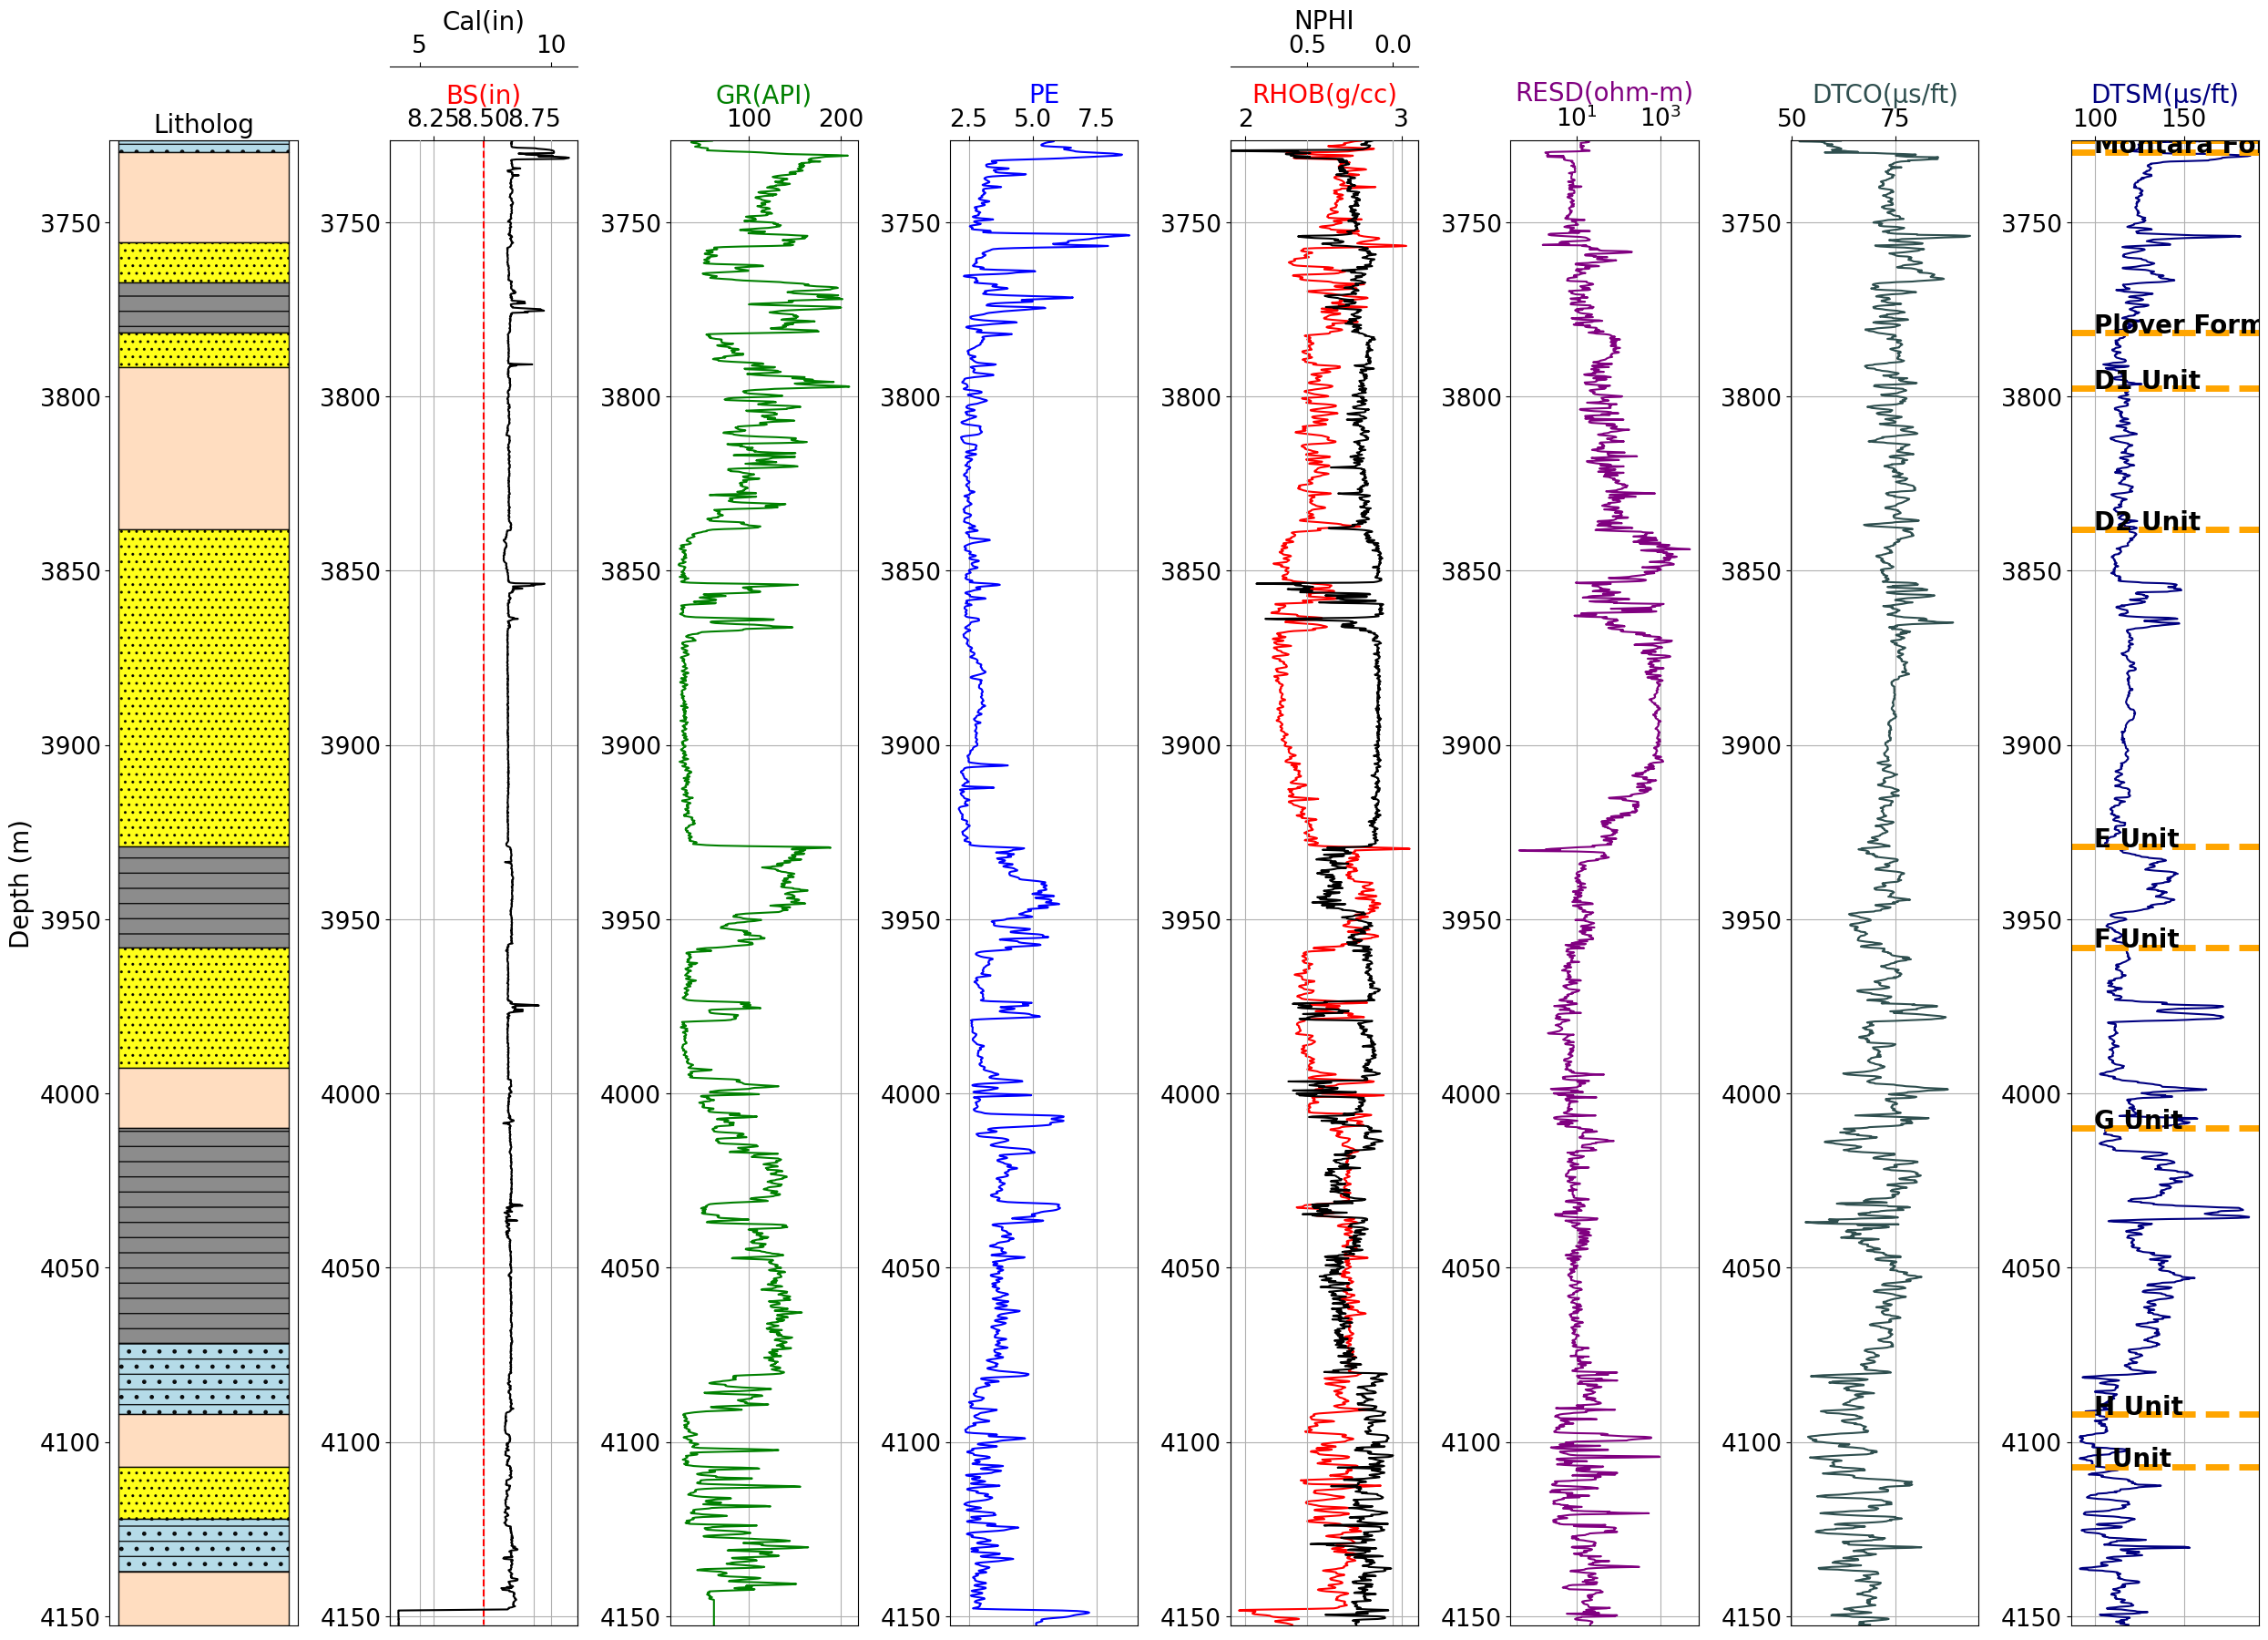

In [10]:
fig = plt.figure(figsize=(25,18))
plt.subplots_adjust(wspace=0.5)

ax0 = plt.subplot2grid((1,8), (0, 0), colspan=1, rowspan=1)
ax1 = plt.subplot2grid((1,8), (0, 1), colspan=1, rowspan=1)
ax111=ax1.twiny()
ax2 = plt.subplot2grid((1,8), (0, 2), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((1,8), (0, 3), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((1,8), (0, 4), colspan=1, rowspan=1)
ax44 = ax4.twiny()
ax5 = plt.subplot2grid((1,8), (0, 5), colspan=1, rowspan=1)
ax6 = plt.subplot2grid((1,8), (0, 6), colspan=1, rowspan=1)
ax7 = plt.subplot2grid((1,8), (0, 7), colspan=1, rowspan=1)

# Set tick label font size
tick_label_size = 19  # Adjust this value as desired for tick label font size

for lith_name, depth_range in lithology_ranges.items():
    color = color_dict[lith_name]
    hatch = hatch_dict[lith_name]
    ax0.fill_betweenx(depth_range, 0, 1, color=color, hatch=hatch, edgecolor='black', alpha=0.9)

ax0.set_ylim(4152.5, 3726.5)
ax0.set_ylabel('Depth (m)', fontsize=20)
ax0.set_title('Litholog', fontsize=20)
ax0.set_xticks([])  
ax0.tick_params(axis='y', labelsize=tick_label_size)

ax1.plot(data.BS, data.DEPTH, color='r', linestyle='--')
ax1.set_ylim(4152.5, 3726.5)
ax1.set_xlabel('BS(in)', color='r', fontsize=20)
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
ax1.tick_params(axis='both', labelsize=tick_label_size)
ax1.grid()

ax111.plot(data.CAL, data.DEPTH, color='k')
ax111.set_ylim(4152.5, 3726.5)
ax111.set_xlabel('Cal(in)', color='k', fontsize=20)
ax111.xaxis.set_ticks_position("top")
ax111.xaxis.set_label_position("top")
ax111.spines['top'].set_position(('axes', 1.05))
ax111.tick_params(axis='both', labelsize=tick_label_size)
ax111.grid()

ax2.plot(logs.GR, logs.DEPTH, color='green')
ax2.set_ylim(4152.5, 3726.5)
ax2.set_xlabel('GR(API)', color='g', fontsize=20)
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")
ax2.tick_params(axis='both', labelsize=tick_label_size)
ax2.grid()

ax3.plot(logs.PE, logs.DEPTH, color='b')
ax3.set_ylim(4152.5, 3726.5)
ax3.set_xlabel('PE', color='b', fontsize=20)
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.tick_params(axis='both', labelsize=tick_label_size)
ax3.grid()

ax4.plot(logs.RHOB, logs.DEPTH, color='r')
ax4.set_ylim(4152.5, 3726.5)
ax4.set_xlabel('RHOB(g/cc)', color='r', fontsize=20)
ax4.xaxis.set_ticks_position("top")
ax4.xaxis.set_label_position("top")
ax4.tick_params(axis='both', labelsize=tick_label_size)
ax4.grid()

ax44.plot(logs.NPHI, logs.DEPTH, color='k')
ax44.set_ylim(4152.5, 3726.5)
ax44.set_xlim(0.95, -0.15)
ax44.set_xlabel('NPHI', color='k', fontsize=20)
ax44.xaxis.set_ticks_position("top")
ax44.xaxis.set_label_position("top")
ax44.spines['top'].set_position(('axes', 1.05))
ax44.tick_params(axis='both', labelsize=tick_label_size)
ax44.grid()

ax5.plot(data.RESD, data.DEPTH, color='purple')
ax5.set_ylim(4152.5, 3726.5)
ax5.set_xlabel('RESD(ohm-m)', color='purple', fontsize=20)
ax5.semilogx()
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.tick_params(axis='both', labelsize=tick_label_size)
ax5.grid()

ax6.plot(logs.DTCO, logs.DEPTH, color='darkslategrey')
ax6.set_ylim(4152.5, 3726.5)
ax6.set_xlabel('DTCO(µs/ft)', color='darkslategrey', fontsize=20)
ax6.xaxis.set_ticks_position("top")
ax6.xaxis.set_label_position("top")
ax6.tick_params(axis='both', labelsize=tick_label_size)
ax6.grid()

ax7.plot(logs.DTSM, logs.DEPTH, color='navy')
ax7.set_ylim(4152.5, 3726.5)
ax7.set_xlabel('DTSM(µs/ft)', color='navy', fontsize=20)
ax7.xaxis.set_ticks_position("top")
ax7.xaxis.set_label_position("top")
ax7.tick_params(axis='both', labelsize=tick_label_size)
ax7.grid()

# Define the formation tops and depths as given in your data
formation_tops = [
    (597.5, 1251.5, "Barracouta Formation"),
    (1251.5, 2065.9, "Oliver Formation"),
    (2065.9, 3277, "Prion Formation"),
    (3277, 3322.1, "Bassett Formation"),
    (3322.1, 3371, "Bassett Formation"),
    (3371, 3547.2, "Gibson Formation"),
    (3547.2, 3677.7, "Jamieson Formation"),
    (3677.7, 3726.5, "Echuca Shoals Formation"),
    (3726.5, 3730, "Vulcan Formation"),
    (3730, 3781.6, "Montara Formation"),
    (3781.6, 3797.6, "Plover Formation- C Unit"),
    (3797.6, 3838.2, "D1 Unit"),
    (3838.2, 3929.2, "D2 Unit"),
    (3929.2, 3958, "E Unit"),
    (3958, 4010, "F Unit"),
    (4010, 4092, "G Unit"),
    (4092, 4107, "H Unit"),
    (4107, 4152.5, "I Unit"),
]

# List of all axes except lithology axis
axes = [ax7]


# Loop over formation tops to add horizontal lines and labels
for top, bottom, formation in formation_tops:
    for ax in axes:
        ax.axhline(y=top, color='orange', linestyle='--', linewidth=5)
        ax.text(0.12, top, formation, color='k', fontsize=20,fontweight='bold', ha='left', transform=ax.get_yaxis_transform(), clip_on=True)

plt.tight_layout()
plt.show()

fig.savefig("basiclogs.png", dpi=450)


# Rock properties 

**Vp, Vs calculation and density unit conversion**

In [11]:
# Calculate Vp, Vs and Convert density to kg/m3

logs['Vp'] = 304800/ logs['DTCO']  # P-wave velocity in m/s
logs['Vs'] = 304800/ logs['DTSM']  # S-wave velocity in m/s
logs['RHOB_kg']=logs['RHOB']*1000
logs.head()

DEPTH       GR    RHOB     DTCO      DTSM    NPHI      PE     RESD  \
0  3726.6372  59.4991  2.7423  61.8411  170.3353  0.1195  5.8331  16.7065   
1  3726.7896  43.0537  2.6995  51.7935  158.5045  0.1302  5.8255  17.9721   
2  3726.9420  37.0043  2.6840  56.8889  146.0065  0.1587  5.7245  19.7639   
3  3727.0944  36.7555  2.6694  57.6598  130.0320  0.1515  5.5769  17.5452   
4  3727.2468  39.0882  2.6492  57.9286  125.1520  0.1490  5.5006  12.3596   

     RESS  RES_MUD    DEVI    VPVS           Vp           Vs  RHOB_kg  
0  3.1274   0.0240  0.6177  2.7544  4928.760970  1789.411825   2742.3  
1  3.1737   0.0254  0.6172  3.0603  5884.908338  1922.973796   2699.5  
2  4.3064   0.0270  0.6182  2.5665  5357.811454  2087.578293   2684.0  
3  4.0337   0.0277  0.6176  2.2552  5286.178585  2344.038391   2669.4  
4  3.6578   0.0280  0.6188  2.1605  5261.649686  2435.438507   2649.2

**Rock Properties Calculation**

In [12]:
logs['K'] = logs['RHOB_kg']*(logs['Vp']**2 - (4/3)*(logs['Vs'])**2)*(1.e-9) # Bulk modulus
logs['mu'] = logs['RHOB_kg']*(logs['Vs']**2)*(1.e-9) # Shear modulus
logs['l'] = logs['RHOB_kg']*((logs['Vp']**2) - 2*(logs['Vs']**2))*(1.e-9) # Lames parameter
logs['v'] = ((logs['Vp']**2) - 2*(logs['Vs']**2))/(2*((logs['Vp']**2) - (logs['Vs']**2)))  #poissons ratio
logs['E'] = logs['RHOB_kg']*(logs['Vs']**2)*((3*(logs['Vp']**2) - 4*(logs['Vs']**2))/((logs['Vp']**2) - (logs['Vs']**2)))*(1.e-9)  # Youngs modulus

**UCS calculation**

In [13]:
# UCS formulas are different for different lithologies. So define separate dataframes for each lithology and apply the respective formulas.
depth_ranges = [
    (3726.5, 3730),
    (3730, 3767.2),
    (3767.2, 3781.7),
    (3781.7, 3929.2),
    (3929.2, 3958),
    (3958, 4010),
    (4010, 4071.5),
    (4071.5, 4092),
    (4092,4122.1),
    (4122.1,4137.3),
    (4137.3,4152.5)
]

dfs = []

# Iterate over depth ranges and create DataFrames
for lower, upper in depth_ranges:
    df_filtered = logs[(logs['DEPTH'] >= lower) & (logs['DEPTH'] < upper)]
    dfs.append(df_filtered)

# Assign names to the DataFrames for easy reference
dflime_1 = dfs[0] # lime
dfsand_1 = dfs[1] # sand
dfshale_1 = dfs[2] # shale
dfsand_2 = dfs[3] # Sand
dfshale_2 = dfs[4] # shale
dfsand_3 = dfs[5] # lime
dfshale_3 = dfs[6] # sand
dflime_2 = dfs[7] # lime
dfsand_4 = dfs[8] # sand
dflime_3 = dfs[9]
dfsand_5 = dfs[10]


**Sand**

In [14]:
ucs_sand1 = 1.4138*1e7*dfsand_1['DTCO']**-3
ucs_sand2 = 1.4138*1e7*dfsand_2['DTCO']**-3
ucs_sand3 = 1.4138*1e7*dfsand_3['DTCO']**-3
ucs_sand4 = 1.4138*1e7*dfsand_4['DTCO']**-3
ucs_sand5 = 1.4138*1e7*dfsand_5['DTCO']**-3

**Shale**

In [15]:
ucs_shale1 = 1.35*(304.8/dfshale_1['DTCO'])**2.6
ucs_shale2 = 1.35*(304.8/dfshale_2['DTCO'])**2.6
ucs_shale3 = 1.35*(304.8/dfshale_3['DTCO'])**2.6

**Limestone**

In [16]:
ucs_lime1 = 135.9*np.exp(-4.8*dflime_1['NPHI'])
ucs_lime2 = 135.9*np.exp(-4.8*dflime_2['NPHI'])
ucs_lime3 = 135.9*np.exp(-4.8*dflime_3['NPHI'])

In [17]:
# Attach these calculated UCS to the logs dataframe
df_lime1 = pd.DataFrame({'ucs_lime1': ucs_lime1})
df_sand1 = pd.DataFrame({'ucs_sand1': ucs_sand1})
df_shale1 = pd.DataFrame({'ucs_shale1': ucs_shale1})
df_sand2 = pd.DataFrame({'ucs_sand2': ucs_sand2})
df_shale2 = pd.DataFrame({'ucs_shale2': ucs_shale2})
df_sand3 = pd.DataFrame({'ucs_sand3': ucs_sand3})
df_shale3 = pd.DataFrame({'ucs_shale3': ucs_shale3})
df_lime2 = pd.DataFrame({'ucs_lime2': ucs_lime2})
df_sand4 = pd.DataFrame({'ucs_sand4': ucs_sand4})
df_lime3 = pd.DataFrame({'ucs_lime3': ucs_lime3})
df_sand5 = pd.DataFrame({'ucs_sand5': ucs_sand5})

concatenated_ucs = pd.concat([df_lime1['ucs_lime1'], df_sand1['ucs_sand1'], df_shale1['ucs_shale1'], df_sand2['ucs_sand2'], df_shale2['ucs_shale2'], df_sand3['ucs_sand3'], df_shale3['ucs_shale3'], df_lime2['ucs_lime2'], df_sand4['ucs_sand4'], df_lime3['ucs_lime3'], df_sand5['ucs_sand5']], axis=0)

concatenated_ucs.reset_index(drop=True, inplace=True)

logs['UCS'] = concatenated_ucs


**Visualization of rock properties in 1D scenario**

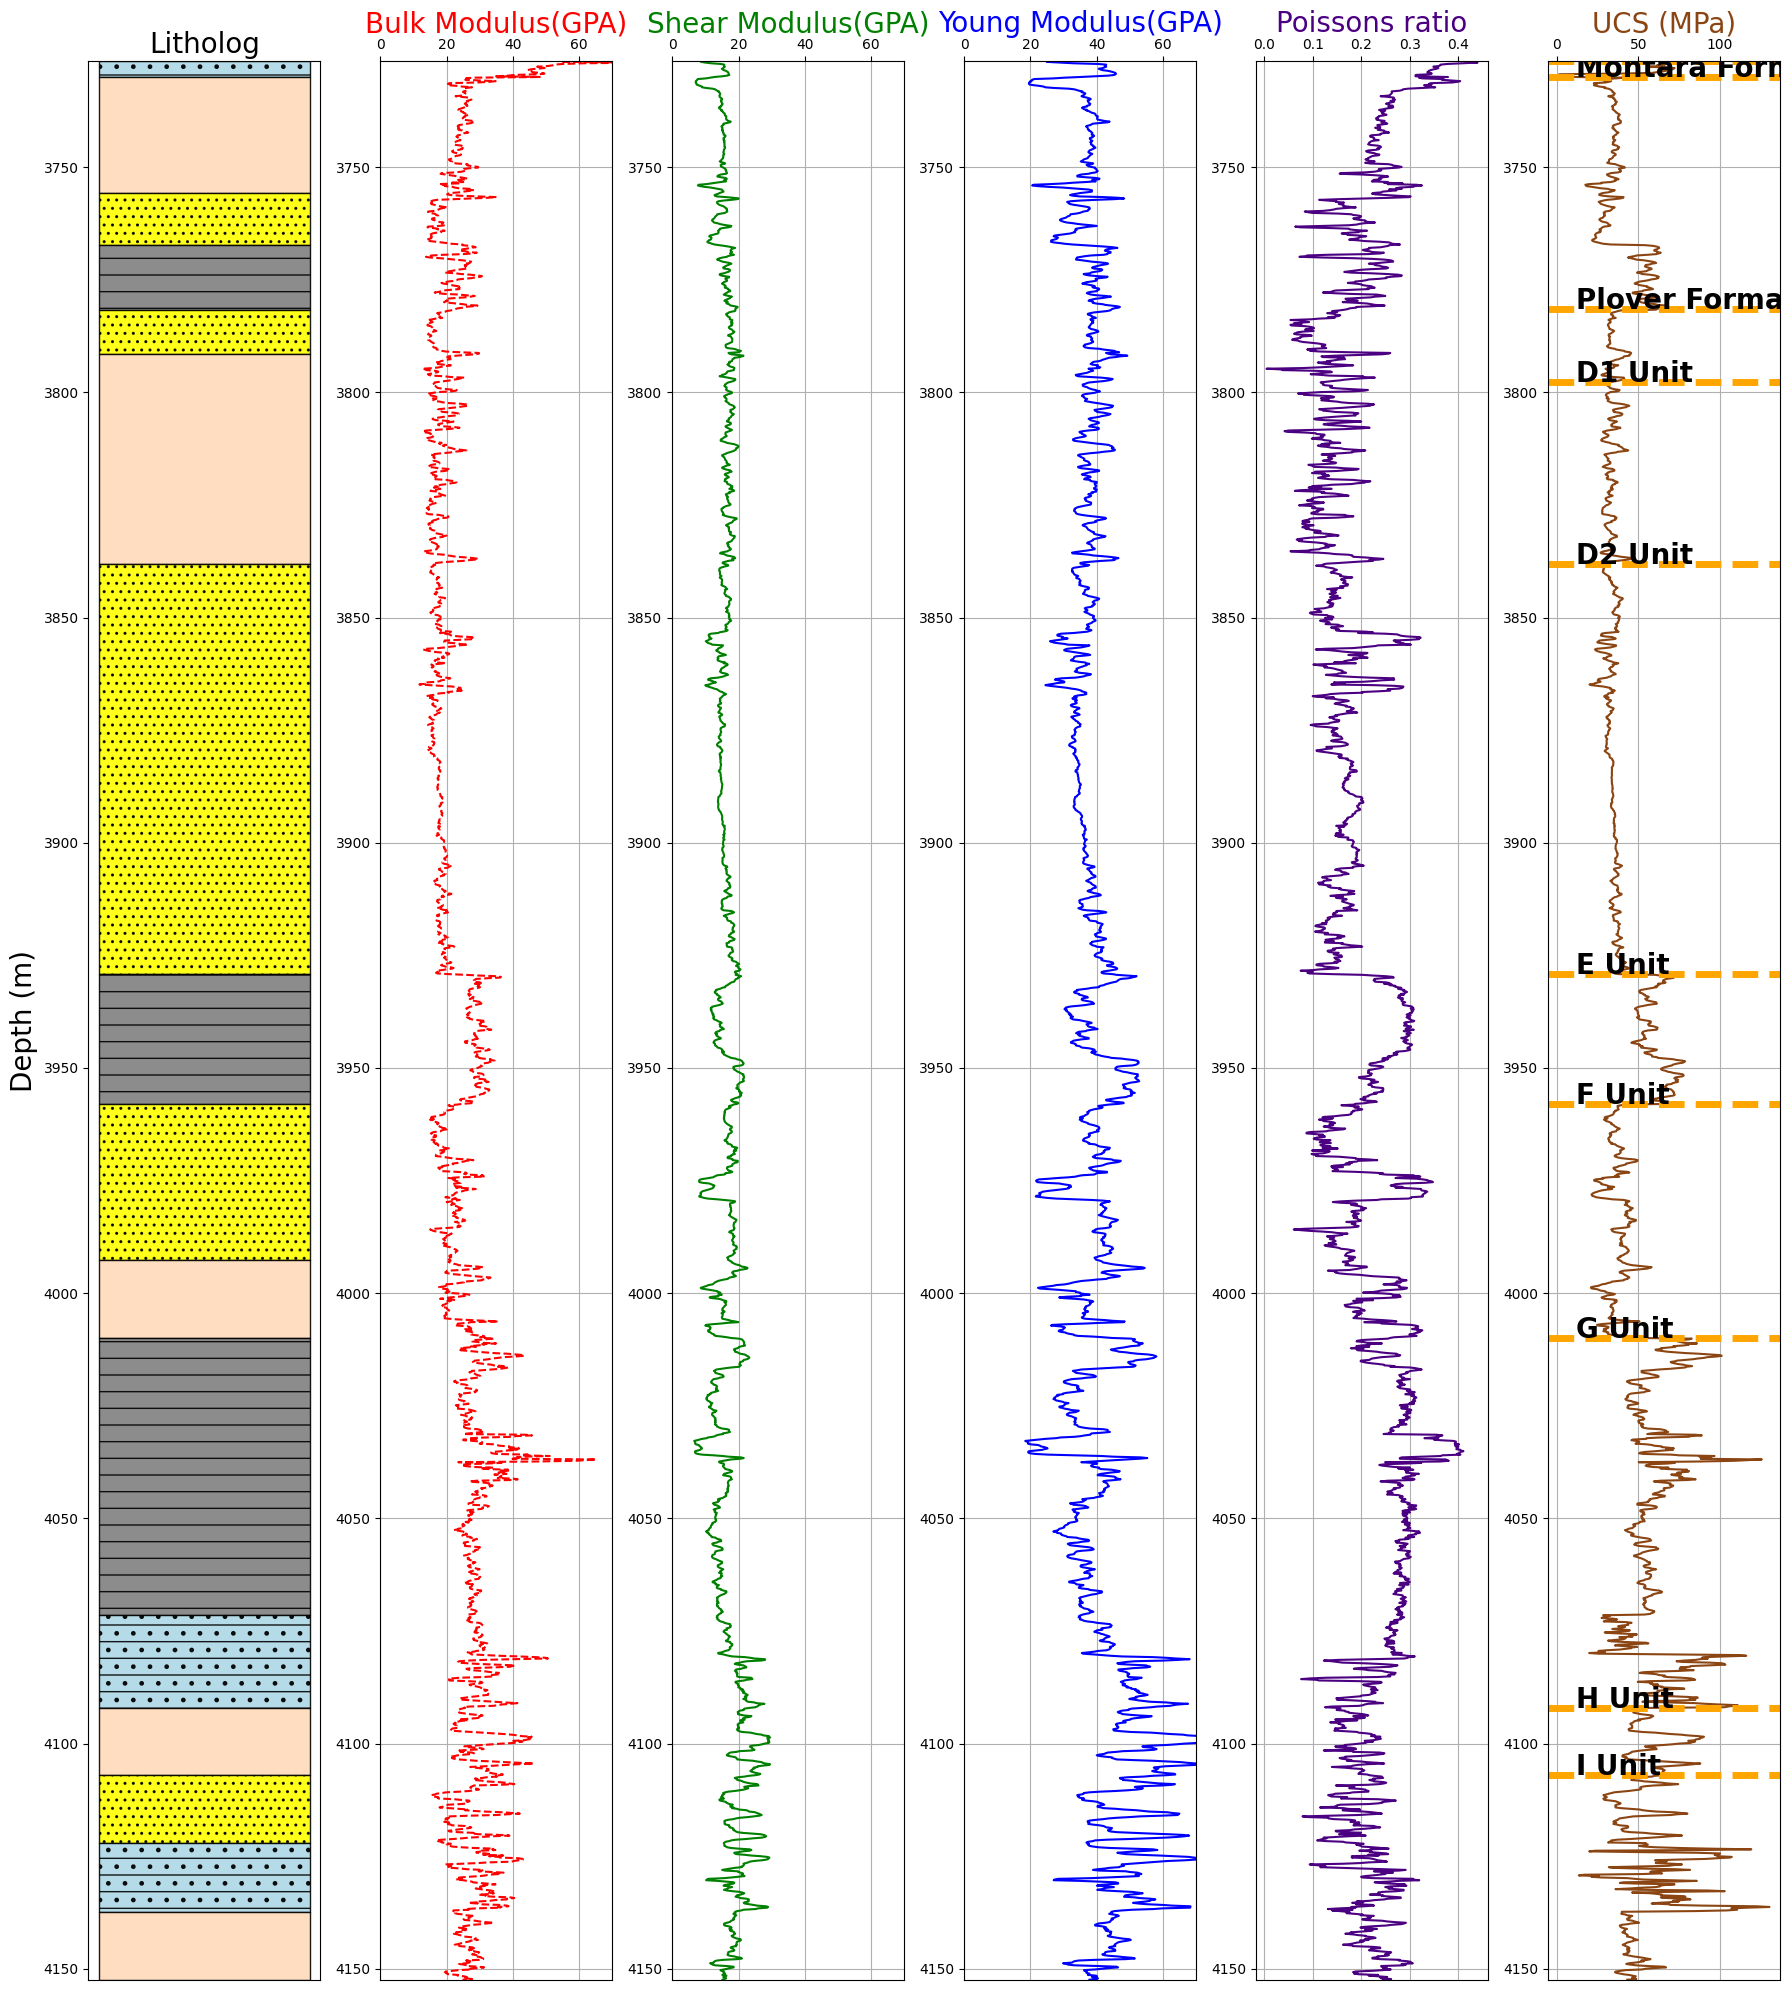

In [18]:
fig = plt.figure(figsize=(18,20))
plt.subplots_adjust(wspace=0.5)

ax0 = plt.subplot2grid((1,6), (0, 0), colspan=1, rowspan=1)
ax1 = plt.subplot2grid((1,6), (0, 1), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1,6), (0, 2), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((1,6), (0, 3), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((1,6), (0, 4), colspan=1, rowspan=1)
ax5 = plt.subplot2grid((1,6), (0, 5), colspan=1, rowspan=1)


for lith_name, depth_range in lithology_ranges.items():
    color = color_dict[lith_name]
    hatch = hatch_dict[lith_name]
    ax0.fill_betweenx(depth_range, 0, 1, color=color, hatch=hatch, edgecolor='black', alpha=0.9)

ax0.set_ylim(4152.5, 3726.5)
ax0.set_ylabel('Depth (m)',fontsize=20)
ax0.set_title('Litholog',fontsize=20)
ax0.set_xticks([])  


ax1.plot(logs.K,logs.DEPTH,color='r', linestyle='--',linewidth=1.5)
ax1.set_ylim(4152.5, 3726.5)
ax1.set_xlim(0,70)
ax1.set_xlabel('Bulk Modulus(GPA)',color='r',fontsize=20)
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
#ax1.tick_params(axis='both',which='major', labelsize=15)
ax1.grid()


ax2.plot(logs.mu,logs.DEPTH,color='green',linewidth=1.5)
ax2.set_ylim(4152.5, 3726.5)
ax2.set_xlim(0,70)
ax2.set_xlabel('Shear Modulus(GPA)',color='g',fontsize=20)
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")
ax2.grid()


ax3.plot(logs.E,logs.DEPTH,color='b',linewidth=1.5)
ax3.set_ylim(4152.5, 3726.5)
ax3.set_xlim(0,70)
ax3.set_xlabel('Young Modulus(GPA)',color='b',fontsize=20)
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.grid()



ax4.plot(logs.v,logs.DEPTH,color='indigo',linewidth=1.5)
ax4.set_ylim(4152.5, 3726.5)
ax4.set_xlabel('Poissons ratio',color='indigo',fontsize=20)
ax4.xaxis.set_ticks_position("top")
ax4.xaxis.set_label_position("top")
ax4.grid()


ax5.plot(logs.UCS,logs.DEPTH,color='saddlebrown',linewidth=1.5)
ax5.set_ylim(4152.5, 3726.5)
#ax5.set_xlim(0, 100)
ax5.set_xlabel('UCS (MPa)',color='saddlebrown',fontsize=20)
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.grid()

# List of all axes except lithology axis
axes = [ax5]

# Loop over formation tops to add horizontal lines and labels
for top, bottom, formation in formation_tops:
    for ax in axes:
        ax.axhline(y=top, color='orange', linestyle='--', linewidth=5)  # Add horizontal line at the top of each formation
        ax.text(0.12, top, formation, color='k', fontsize=20,fontweight='bold', ha='left', transform=ax.get_yaxis_transform(), clip_on=True)

plt.tight_layout()

fig.savefig("rockprops.png", dpi=450)

**Calibration using core data**

In [19]:
core_ucs = {
    'DEPTH': [3785.82, 3800.28, 3829.29, 3810.35, 3844.75, 3925.29, 3966.78],
    'UCS': [32.3, 43, 30.29, 27.6, 22.15, 32.79, 35.03]
}
core_ucs_df = pd.DataFrame(core_ucs)

core_E_pr = pd.DataFrame({
    'Depth': [3785.82, 3889.71, 3967],
    'Youngs Mod': [28.5, 30.46, 37.53],
    'Poissons Ratio': [0.18, 0.22, 0.22]
}) 

**Static-dynamic conversion**

Linear relation: Static E = 0.9553 * Dynamic E + -3.4836
R-squared value: 0.3727


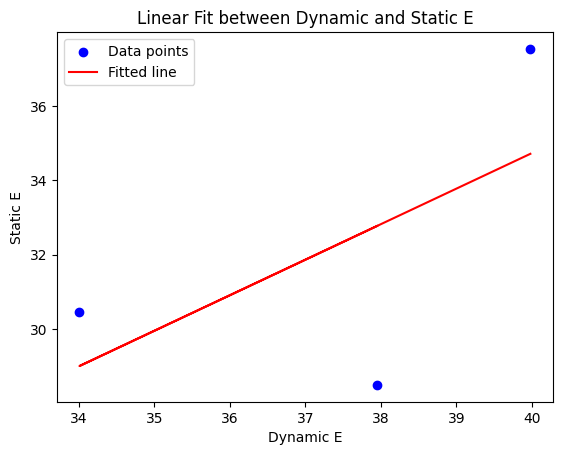

In [20]:
# For Youngs Modulus

static_e = np.array([28.5, 30.46, 37.53])
dynamic_e = np.array([37.95,34.01,39.98])

X = dynamic_e.reshape(-1, 1)  # Dynamic UCS on x-axis
y = static_e                   # Static UCS on y-axis

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

print(f"Linear relation: Static E = {model.coef_[0]:.4f} * Dynamic E + {model.intercept_:.4f}")
print(f"R-squared value: {r_squared:.4f}")

plt.scatter(dynamic_e, static_e, color='blue', label='Data points')
plt.plot(dynamic_e, y_pred, color='red', label='Fitted line')
plt.xlabel('Dynamic E')
plt.ylabel('Static E')
plt.title('Linear Fit between Dynamic and Static E')
plt.legend()
plt.show()


Linear relation: Static v = 1.0000 * Dynamic v + 0.1050
R-squared value: 0.8889


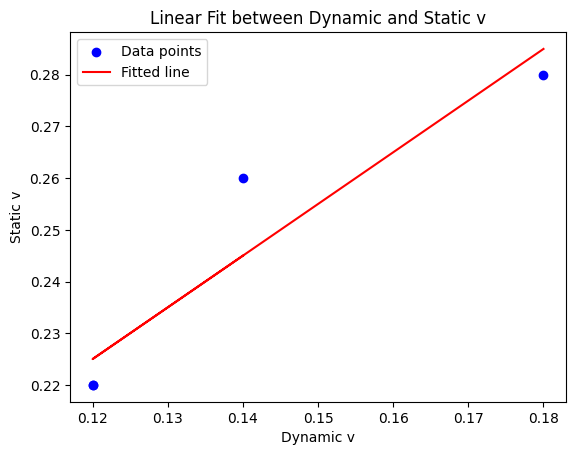

In [21]:
#For Poissons ratio
static_v = np.array([0.28, 0.22, 0.22,0.26])
dynamic_v = np.array([0.18,0.12,0.12,0.14])

X = dynamic_v.reshape(-1, 1)  # Dynamic UCS on x-axis
y = static_v                   # Static UCS on y-axis

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

print(f"Linear relation: Static v = {model.coef_[0]:.4f} * Dynamic v + {model.intercept_:.4f}")
print(f"R-squared value: {r_squared:.4f}")

plt.scatter(dynamic_v, static_v, color='blue', label='Data points')
plt.plot(dynamic_v, y_pred, color='red', label='Fitted line')
plt.xlabel('Dynamic v')
plt.ylabel('Static v')
plt.title('Linear Fit between Dynamic and Static v')
plt.legend()
plt.show()

**Visualization of calibrated rock properties in 1D scenario**

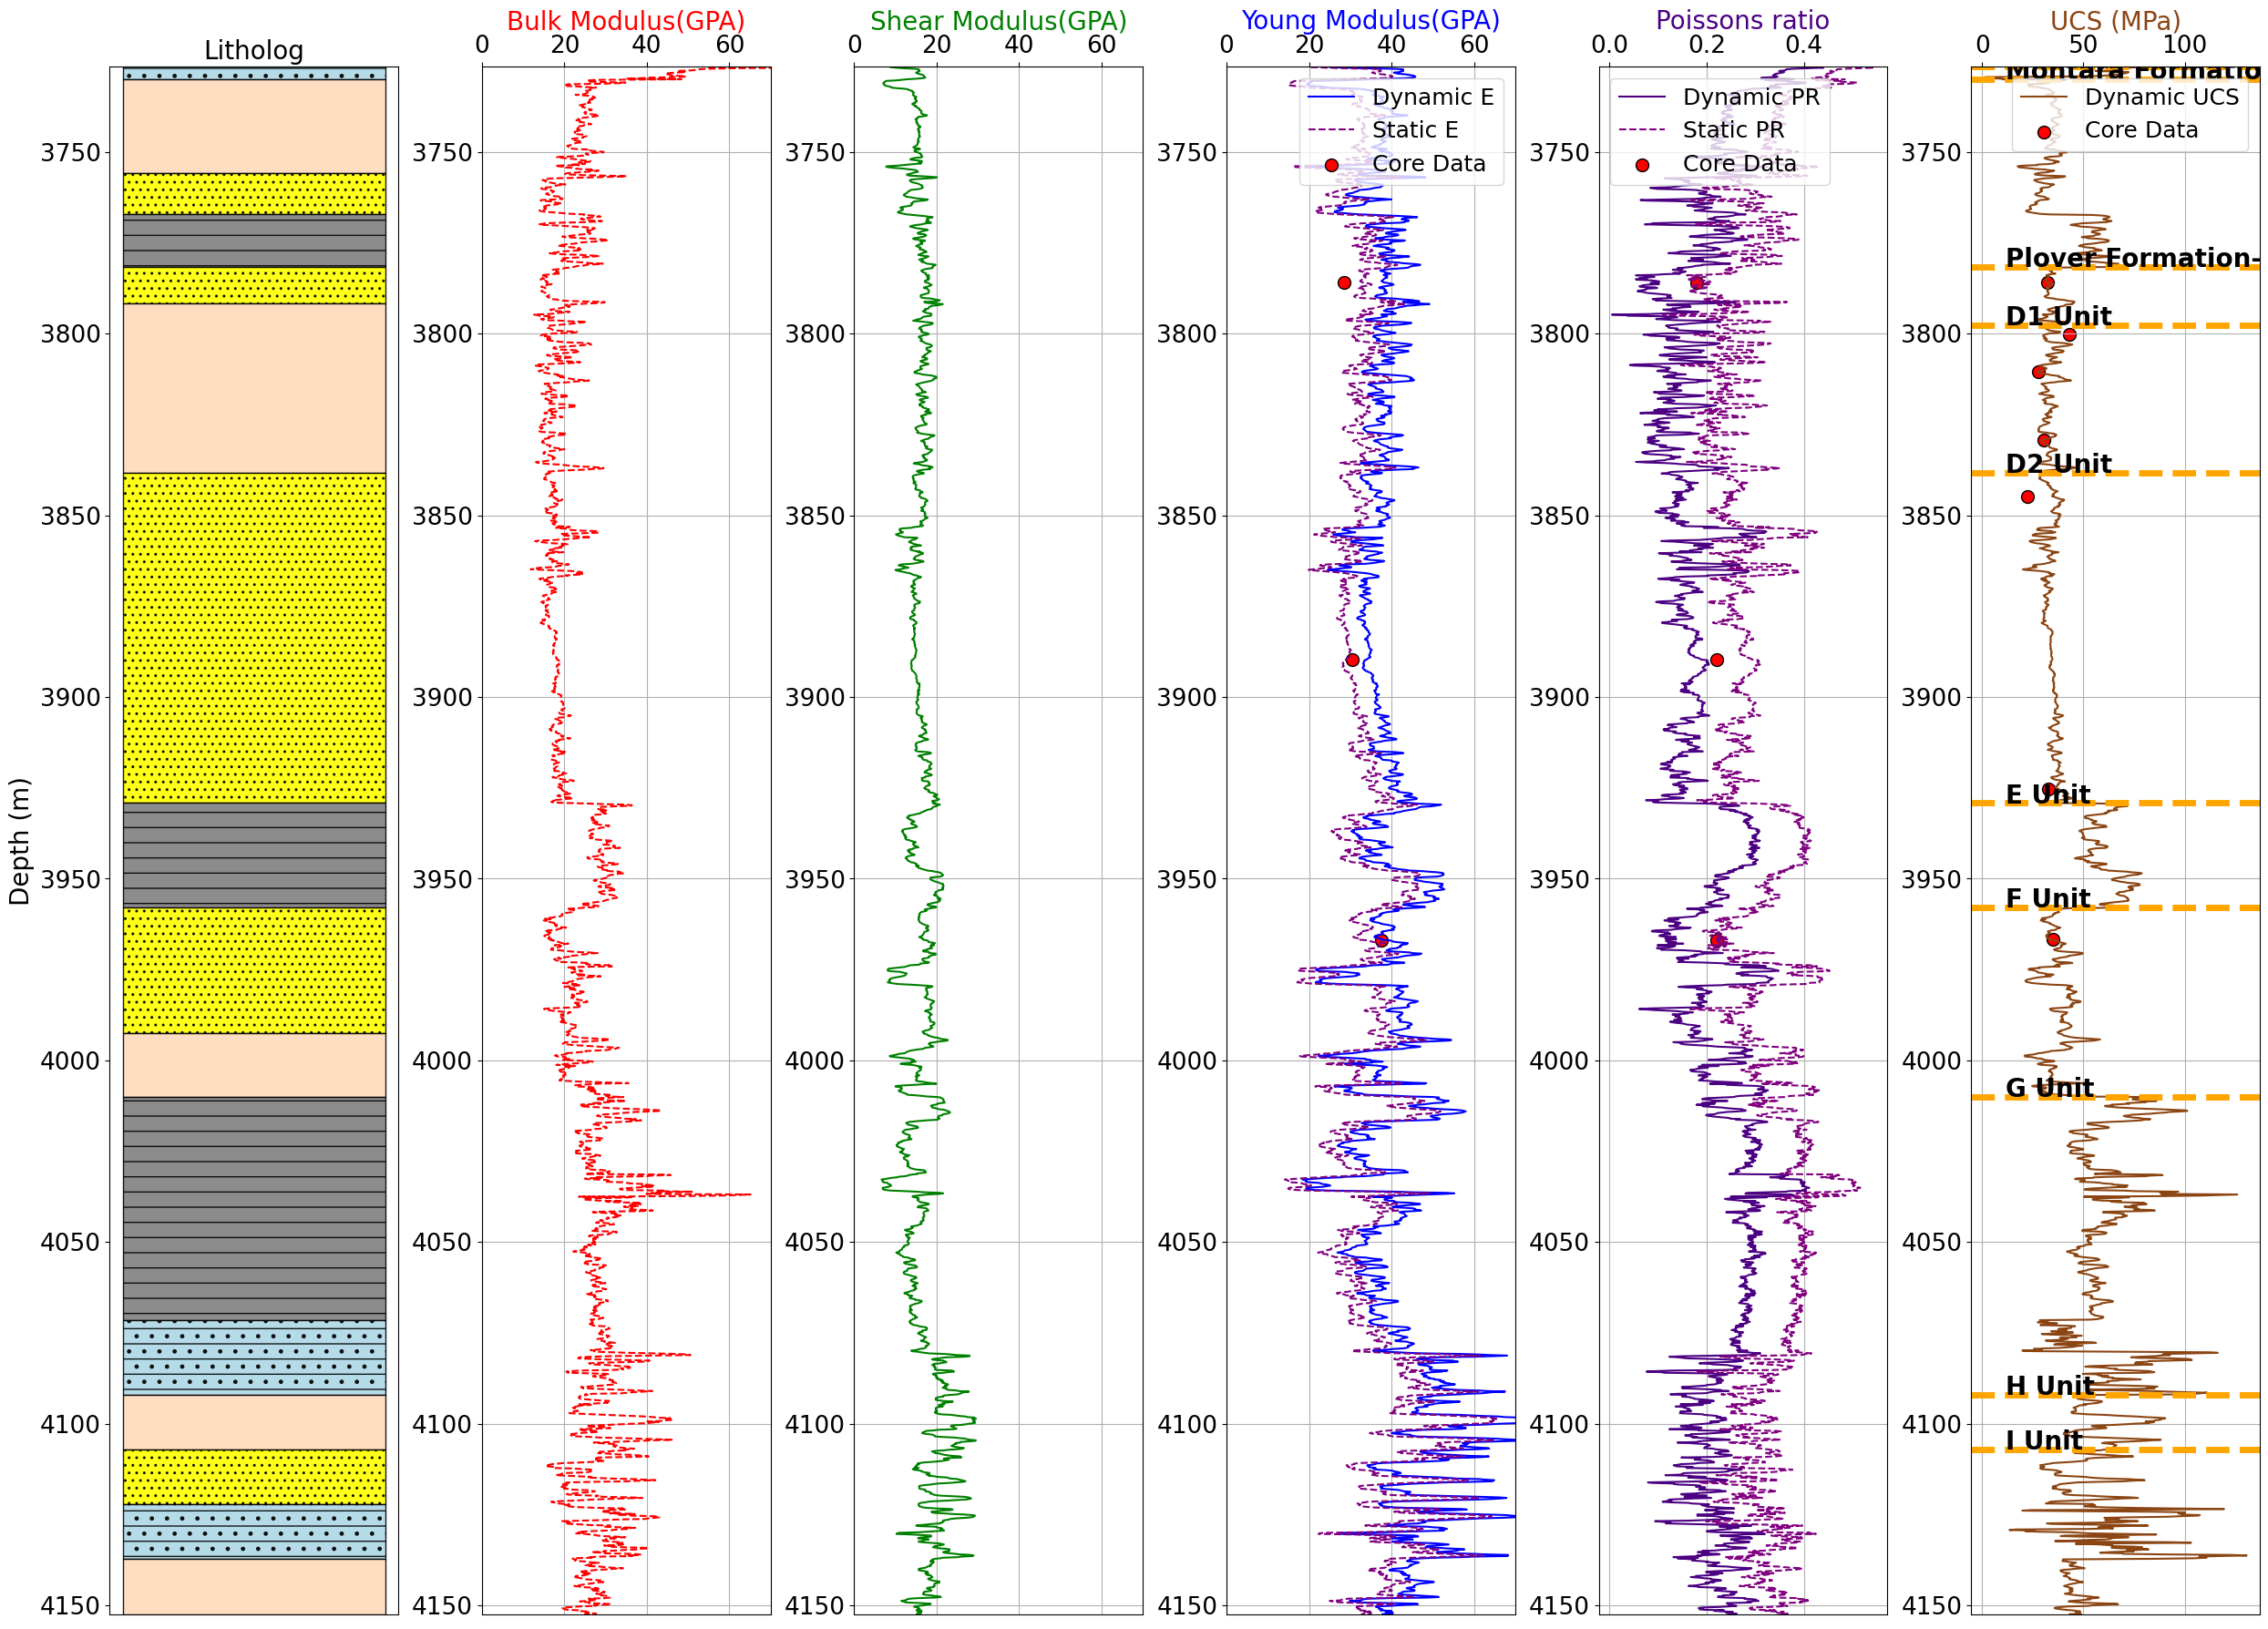

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Estat, Static v, and Static UCS
logs['Estat'] = 0.9553 * logs['E'] + -3.4836
logs['Static v'] = 1.0000 * logs['v'] + 0.1050

# Plotting the lithology and other plots with Estat, Static v, and Static UCS on their respective axes
fig = plt.figure(figsize=(25, 18))
plt.subplots_adjust(wspace=0.5)

ax0 = plt.subplot2grid((1, 6), (0, 0), colspan=1, rowspan=1)
ax1 = plt.subplot2grid((1, 6), (0, 1), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 6), (0, 2), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((1, 6), (0, 3), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((1, 6), (0, 4), colspan=1, rowspan=1)
ax5 = plt.subplot2grid((1, 6), (0, 5), colspan=1, rowspan=1)

# Set tick label font size
tick_label_size = 19  # Adjust this value as needed

# Plot lithology on ax0
for lith_name, depth_range in lithology_ranges.items():
    color = color_dict[lith_name]
    hatch = hatch_dict[lith_name]
    ax0.fill_betweenx(depth_range, 0, 1, color=color, hatch=hatch, edgecolor='black', alpha=0.9)

ax0.set_ylim(4152.5, 3726.5)
ax0.set_ylabel('Depth (m)', fontsize=20)
ax0.set_title('Litholog', fontsize=20)
ax0.set_xticks([])
ax0.tick_params(axis='y', labelsize=tick_label_size)

# Bulk Modulus plot
ax1.plot(logs['K'], logs['DEPTH'], color='r', linestyle='--', linewidth=1.5)
ax1.set_ylim(4152.5, 3726.5)
ax1.set_xlim(0, 70)
ax1.set_xlabel('Bulk Modulus(GPA)', color='r', fontsize=20)
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
ax1.tick_params(axis='both', labelsize=tick_label_size)
ax1.grid()

# Shear Modulus plot
ax2.plot(logs['mu'], logs['DEPTH'], color='green', linewidth=1.5)
ax2.set_ylim(4152.5, 3726.5)
ax2.set_xlim(0, 70)
ax2.set_xlabel('Shear Modulus(GPA)', color='g', fontsize=20)
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")
ax2.tick_params(axis='both', labelsize=tick_label_size)
ax2.grid()

# Young's Modulus plot (including Estat)
ax3.plot(logs['E'], logs['DEPTH'], color='b', linewidth=1.5, label='Dynamic E')
ax3.plot(logs['Estat'], logs['DEPTH'], color='purple', linestyle='--', linewidth=1.5, label='Static E')
ax3.scatter(core_E_pr['Youngs Mod'], core_E_pr['Depth'], color='red', edgecolor='black', s=100, label='Core Data')
ax3.set_ylim(4152.5, 3726.5)
ax3.set_xlim(0, 70)
ax3.set_xlabel('Young Modulus(GPA)', color='b', fontsize=20)
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.tick_params(axis='both', labelsize=tick_label_size)
ax3.legend(loc='upper right',fontsize=18)
ax3.grid()

# Poisson's Ratio plot with Static v
ax4.plot(logs['v'], logs['DEPTH'], color='indigo', linewidth=1.5, label='Dynamic PR')
ax4.plot(logs['Static v'], logs['DEPTH'], color='purple', linestyle='--', linewidth=1.5, label='Static PR')
ax4.scatter(core_E_pr['Poissons Ratio'], core_E_pr['Depth'], color='red', edgecolor='black', s=100, label='Core Data')
ax4.set_ylim(4152.5, 3726.5)
ax4.set_xlabel('Poissons ratio', color='indigo', fontsize=20)
ax4.xaxis.set_ticks_position("top")
ax4.xaxis.set_label_position("top")
ax4.tick_params(axis='both', labelsize=tick_label_size)
ax4.legend(fontsize=18)
ax4.grid()

# UCS plot with Static UCS
ax5.plot(logs['UCS'], logs['DEPTH'], color='saddlebrown', linewidth=1.5, label='Dynamic UCS')
#ax5.plot(logs['Static UCS'], logs['DEPTH'], color='purple', linestyle='--', linewidth=1.5, label='Static UCS')
ax5.scatter(core_ucs_df['UCS'], core_ucs_df['DEPTH'], color='red', edgecolor='black', s=100, label='Core Data')
ax5.set_ylim(4152.5, 3726.5)
ax5.set_xlabel('UCS (MPa)', color='saddlebrown', fontsize=20)
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.tick_params(axis='both', labelsize=tick_label_size)
ax5.legend(loc='upper right',fontsize=18)
ax5.grid()

# List of all axes except lithology axis
axes = [ax5]

# Loop over formation tops to add horizontal lines and labels
for top, bottom, formation in formation_tops:
    for ax in axes:
        ax.axhline(y=top, color='orange', linestyle='--', linewidth=5)
        ax.text(0.12, top, formation, color='k', fontsize=20,fontweight='bold', ha='left', transform=ax.get_yaxis_transform(), clip_on=True)

plt.tight_layout()
plt.show()

fig.savefig("rockpropsfinal.png", dpi=600)


## Pore Pressure Calculation

**Loading the mud weight data for calibration** 

In [23]:
file_path = r"D:\AGP\THESIS\For python\Calliance-1_Drilldata_3286-4178mMD.las"
mud = lasio.read(file_path)
mud_df = mud.df()

In [24]:
mud_df = mud_df.dropna(how='all')
mud_df = mud_df.reset_index()
mud_df.columns

Index(['DEPTH', 'DRL', 'L_ROP_AVG      DRLL', '_TQ_AVG       DR',
       'LL_WOB_AVG      DRLL', '_DENSIN_AVG   DRLL', '_DENSOUT_AVG  DRLL',
       '_TEMPIN_AVG   DRLL', '_TEMPOUT_AVG  DRLL_', 'DXC          DRL',
       'L_RPM_AVG      DRLL', '_PUMPP_AVG    DRLL', '_FLOWIN_AVG   DRLL',
       '_ROT_TIME     DRLL', '_BIT_TIME     DRLL_', 'BIT_DIST     DRLL_T',
       'BR', 'DRLL_ROP_AVG:1', 'DRLL_TQ_AVG:1', 'DRLL_WOB_AVG:1',
       'DRLL_DENSIN_AVG:1', 'DRLL_DENSOUT_AVG:1', 'DRLL_TEMPIN_AVG:1',
       'DRLL_TEMPOUT_AVG:1', 'DRLL_DXC:1', 'DRLL_RPM_AVG:1',
       'DRLL_PUMPP_AVG:1', 'DRLL_FLOWIN_AVG:1', 'DRLL_ROT_TIME:1',
       'DRLL_BIT_TIME:1', 'DRLL_BIT_DIST:1', 'DRLL_TBR:1', 'DRLL_ROP_AVG:2',
       'DRLL_TQ_AVG:2', 'DRLL_WOB_AVG:2', 'DRLL_DENSIN_AVG:2',
       'DRLL_DENSOUT_AVG:2', 'DRLL_TEMPIN_AVG:2', 'DRLL_TEMPOUT_AVG:2',
       'DRLL_DXC:2', 'DRLL_RPM_AVG:2', 'DRLL_PUMPP_AVG:2', 'DRLL_FLOWIN_AVG:2',
       'DRLL_ROT_TIME:2', 'DRLL_BIT_TIME:2', 'DRLL_BIT_DIST:2', 'DRLL_TBR:2'],
  

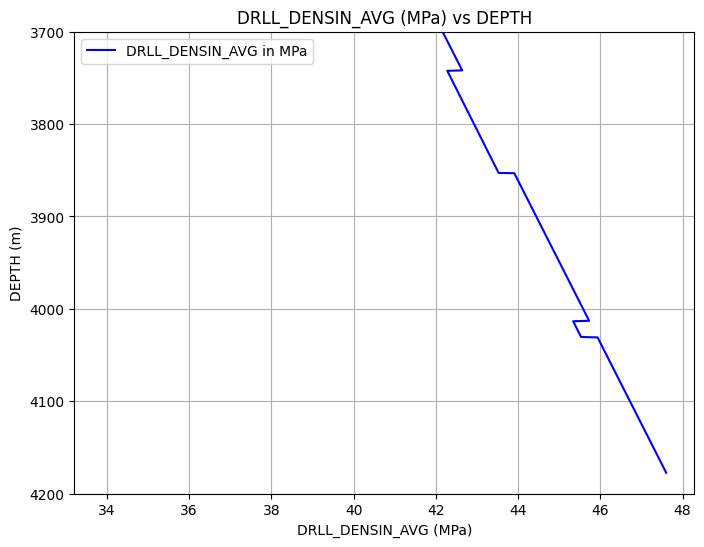

In [25]:
g = 9.82311  # m/s^2
if 'DRLL_DENSIN_AVG:2' in mud_df.columns and 'DEPTH' in mud_df.columns:
    # Convert mudweight to MPa
    mud_df['DRLL_DENSIN_AVG_MPa'] = mud_df['DRLL_DENSIN_AVG:2'] * g * mud_df['DEPTH']/1000
    # Plot the converted DRLL_DENSIN_AVG_MPa vs Depth
    plt.figure(figsize=(8, 6))
    plt.plot(mud_df['DRLL_DENSIN_AVG_MPa'], mud_df['DEPTH'], color='b', label='DRLL_DENSIN_AVG in MPa')
    #plt.gca().invert_yaxis()  # Depth usually increases downwards
    plt.xlabel('DRLL_DENSIN_AVG (MPa)')
    plt.ylabel('DEPTH (m)')
    plt.ylim(4200,3700)
    plt.title('DRLL_DENSIN_AVG (MPa) vs DEPTH')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("One or both columns 'DRLL_DENSIN_AVG:2' or 'DEPTH' not found in mud_df.")

**Data preparation for Pore pressure calculation**

In [26]:
depths = np.arange(0, 3726.5 + 0.5, 0.5)
df = pd.DataFrame({'DEPTH': depths})
df['RHOB'] = np.where(df['DEPTH'] <= 597.5, 1.0, 2.3)
df = pd.concat([df, logs], ignore_index=True)
df.tail()

DEPTH    RHOB       GR     DTCO      DTSM    NPHI      PE     RESD  \
10244  4151.8332  2.2443  61.5828  66.8700  116.4116  0.2119  5.1652  22.5449   
10245  4151.9856  2.2630  61.5828  67.3843  115.1393  0.2180  5.1339  22.6660   
10246  4152.1380  2.2783  61.5828  66.5813  114.1022  0.2145  5.1305  21.2156   
10247  4152.2904  2.2909  61.5828  66.1716  116.5024  0.2159  5.1302  20.8782   
10248  4152.4428  2.3017  61.5828  68.9150  118.7249  0.2129  5.1397  20.8381   

         RESS  RES_MUD  ...           Vs  RHOB_kg          K         mu  \
10244  0.1314   0.0061  ...  2618.295771   2244.3  26.113834  15.385737   
10245  0.1377   0.0061  ...  2647.228184   2263.0  25.156791  15.858690   
10246  0.1401   0.0061  ...  2671.289423   2278.3  26.069305  16.257464   
10247  0.1462   0.0062  ...  2616.255116   2290.9  27.698683  15.680731   
10248  0.1539   0.0062  ...  2567.279484   2301.7  24.797624  15.170330   

               l         v          E        UCS      Estat  Static v  
10244  15.856675  0.253768  38.580303  47.281801  33.372164  0.358768  
10245  14.584331  0.239535  39.314799  46.207430  34.073827  0.344535  
10246  15.230995  0.241850  40.378677  47.899520  35.090151  0.346850  
10247  17.244862  0.261876  39.574285  48.794747  34.321714  0.366876  
10248  14.684071  0.245928  37.802280  43.196315  32.628918  0.350928  

[5 rows x 23 columns]

**Vertical stress and Hydrostatic Pressure**

In [27]:
pf = 1.0  # fluid density in g/cm^3
g = 10.0  # gravitational acceleration in m/s^2

# Calculate the depth increments (dz)
df['dz'] = df['DEPTH'].diff().fillna(0)  # Set the first depth increment to 0

df['Phydro'] = (pf * g * df['dz'] * 1e-3).cumsum()  # Convert to MPa by multiplying by 1e-3

delta_z = np.gradient(df['DEPTH'])

df['Sv'] = np.cumsum((df.RHOB*g*delta_z)/1000)
df.tail()

DEPTH    RHOB       GR     DTCO      DTSM    NPHI      PE     RESD  \
10244  4151.8332  2.2443  61.5828  66.8700  116.4116  0.2119  5.1652  22.5449   
10245  4151.9856  2.2630  61.5828  67.3843  115.1393  0.2180  5.1339  22.6660   
10246  4152.1380  2.2783  61.5828  66.5813  114.1022  0.2145  5.1305  21.2156   
10247  4152.2904  2.2909  61.5828  66.1716  116.5024  0.2159  5.1302  20.8782   
10248  4152.4428  2.3017  61.5828  68.9150  118.7249  0.2129  5.1397  20.8381   

         RESS  RES_MUD  ...         mu          l         v          E  \
10244  0.1314   0.0061  ...  15.385737  15.856675  0.253768  38.580303   
10245  0.1377   0.0061  ...  15.858690  14.584331  0.239535  39.314799   
10246  0.1401   0.0061  ...  16.257464  15.230995  0.241850  40.378677   
10247  0.1462   0.0062  ...  15.680731  17.244862  0.261876  39.574285   
10248  0.1539   0.0062  ...  15.170330  14.684071  0.245928  37.802280   

             UCS      Estat  Static v      dz     Phydro         Sv  
10244  47.281801  33.372164  0.358768  0.1524  41.518332  88.609657  
10245  46.207430  34.073827  0.344535  0.1524  41.519856  88.613106  
10246  47.899520  35.090151  0.346850  0.1524  41.521380  88.616578  
10247  48.794747  34.321714  0.366876  0.1524  41.522904  88.620069  
10248  43.196315  32.628918  0.350928  0.1524  41.524428  88.623577  

[5 rows x 26 columns]

**Plotting**

C:\Users\user\AppData\Local\Temp\ipykernel_8748\3307440847.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)


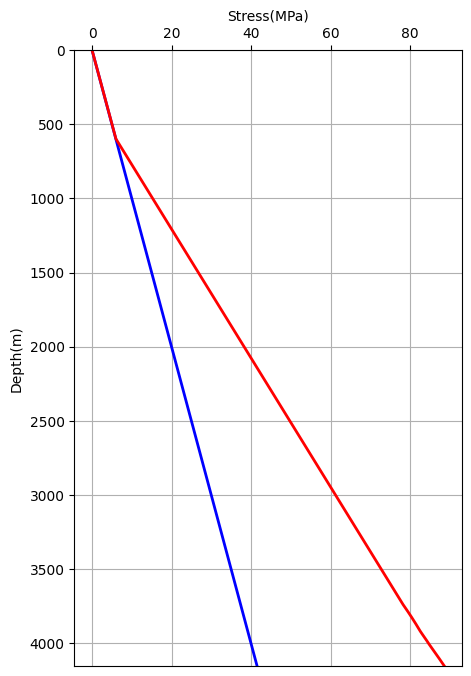

In [28]:
fig, axes = plt.subplots(figsize=(5, 8))
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax.plot(df.Phydro, df.DEPTH, color='blue', label='Hydrostatic Pressure (MPa)', linewidth=2)
ax.plot(df.Sv, df.DEPTH, color='red', label='Overburden Stress (MPa)', linewidth=2)
ax.set_ylim(4152.5,0)
ax.set_xlabel('Stress(MPa)')
ax.set_ylabel('Depth(m)')
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.grid()  


**Density porosity calculation**

In [29]:
matrix_density = 2.65  # g/cm³
fluid_density = 1.0    # g/cm³
df['Density_porosity'] = (matrix_density - df['RHOB']) / (matrix_density - fluid_density)
df['Density_porosity'] = df['Density_porosity'] * 100 #Convert to percentage
df['Density_porosity'] = df['Density_porosity'].clip(lower=0)
df.tail()


DEPTH    RHOB       GR     DTCO      DTSM    NPHI      PE     RESD  \
10244  4151.8332  2.2443  61.5828  66.8700  116.4116  0.2119  5.1652  22.5449   
10245  4151.9856  2.2630  61.5828  67.3843  115.1393  0.2180  5.1339  22.6660   
10246  4152.1380  2.2783  61.5828  66.5813  114.1022  0.2145  5.1305  21.2156   
10247  4152.2904  2.2909  61.5828  66.1716  116.5024  0.2159  5.1302  20.8782   
10248  4152.4428  2.3017  61.5828  68.9150  118.7249  0.2129  5.1397  20.8381   

         RESS  RES_MUD  ...          l         v          E        UCS  \
10244  0.1314   0.0061  ...  15.856675  0.253768  38.580303  47.281801   
10245  0.1377   0.0061  ...  14.584331  0.239535  39.314799  46.207430   
10246  0.1401   0.0061  ...  15.230995  0.241850  40.378677  47.899520   
10247  0.1462   0.0062  ...  17.244862  0.261876  39.574285  48.794747   
10248  0.1539   0.0062  ...  14.684071  0.245928  37.802280  43.196315   

           Estat  Static v      dz     Phydro         Sv  Density_porosity  
10244  33.372164  0.358768  0.1524  41.518332  88.609657         24.587879  
10245  34.073827  0.344535  0.1524  41.519856  88.613106         23.454545  
10246  35.090151  0.346850  0.1524  41.521380  88.616578         22.527273  
10247  34.321714  0.366876  0.1524  41.522904  88.620069         21.763636  
10248  32.628918  0.350928  0.1524  41.524428  88.623577         21.109091  

[5 rows x 27 columns]

**Determining the compaction constant**

In [30]:
# Remove rows where NPHI contains NaN or zero values
logs_filtered = logs[logs['NPHI'] > 0]
depths = logs_filtered['DEPTH'].values.reshape(-1, 1)
nphi =logs_filtered['NPHI'].values
log_nphi = np.log(nphi)
model = LinearRegression()
model.fit(depths, log_nphi)
slope = model.coef_[0]
intercept = model.intercept_
c = -slope
print(f"Compaction constant (c): {str(c)[:str(c).find('.') + 5]}")
print(f"Intercept: {str(intercept)[:str(intercept).find('.') + 5]}")
print(f"Slope: {str(slope)[:str(slope).find('.') + 5]}")

Compaction constant (c): 0.0001
Intercept: -1.0286
Slope: -0.0001


**Normal Compaction trend**

In [31]:
f0 = 40  # porosity at surface in %
c = 0.0001
Z = df.DEPTH
f_values = f0 * np.exp(-c*Z)

C:\Users\user\AppData\Local\Temp\ipykernel_8748\513976203.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)


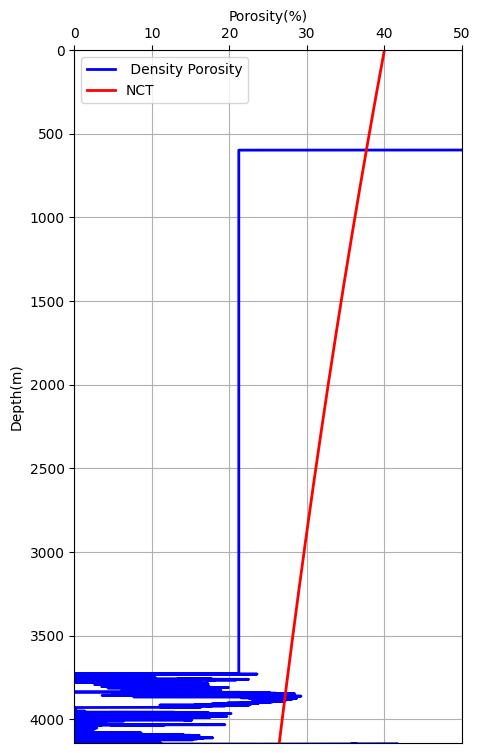

In [32]:
fig, axes = plt.subplots(figsize=(5, 9))
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax.plot(df.Density_porosity, df.DEPTH, color='blue', label=' Density Porosity', linewidth=2)
ax.plot(f_values, df.DEPTH, color='red', label='NCT', linewidth=2)
ax.set_ylim(4142,0)
ax.set_xlim(0,50)
ax.set_xlabel('Porosity(%)', fontsize=10)
ax.set_ylabel('Depth(m)', fontsize=10)
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.grid()  
ax.legend()
fig.savefig("denpor.png", dpi=600)

**Pore pressure calculation**

In [33]:
factor1111 = (np.log(f0) - np.log(df.Density_porosity))/(c*df.DEPTH)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
df['Pp1']= df.Sv - ((df.Sv - df.Phydro)*factor1111)
df.loc[df['Pp1'] < df['Phydro'], 'Pp1'] = df['Phydro']

**Fracture pressure Calculation**

In [35]:
df_zoi= df[(df['DEPTH'] >= 3726.5) & (df['DEPTH'] <=4145)]

In [36]:
fp_par=(3*df_zoi['v'])/(2*(1-df_zoi['v']))
df_zoi['Frac_p']=fp_par*(df_zoi['Sv']-df_zoi['Pp1'])+df_zoi['Pp1']
df_zoi['frac_p_rolling'] = df_zoi['Frac_p'].rolling(window=60).mean()

C:\Users\user\AppData\Local\Temp\ipykernel_8748\761138008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zoi['Frac_p']=fp_par*(df_zoi['Sv']-df_zoi['Pp1'])+df_zoi['Pp1']
C:\Users\user\AppData\Local\Temp\ipykernel_8748\761138008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zoi['frac_p_rolling'] = df_zoi['Frac_p'].rolling(window=60).mean()


**MDT data for calibration**

In [37]:
# Modular Dynamic Test data of pressures
data_m= {
    'depth': [3740, 3760, 3780, 3830, 3840, 3850, 3860, 3900, 3940, 3950, 3960, 3970, 4070, 4090, 4100],
    'pressure': [38.68, 38.77, 38.81, 38.94, 38.97, 38.99, 39.04, 39.13, 39.4, 39.51, 39.59, 39.64, 40.66, 40.84, 40.98]
}
mdt= pd.DataFrame(data_m)

**Plotting the calculated pore pressure along with MDT and Mudweight data**

C:\Users\user\AppData\Local\Temp\ipykernel_8748\1531377387.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)


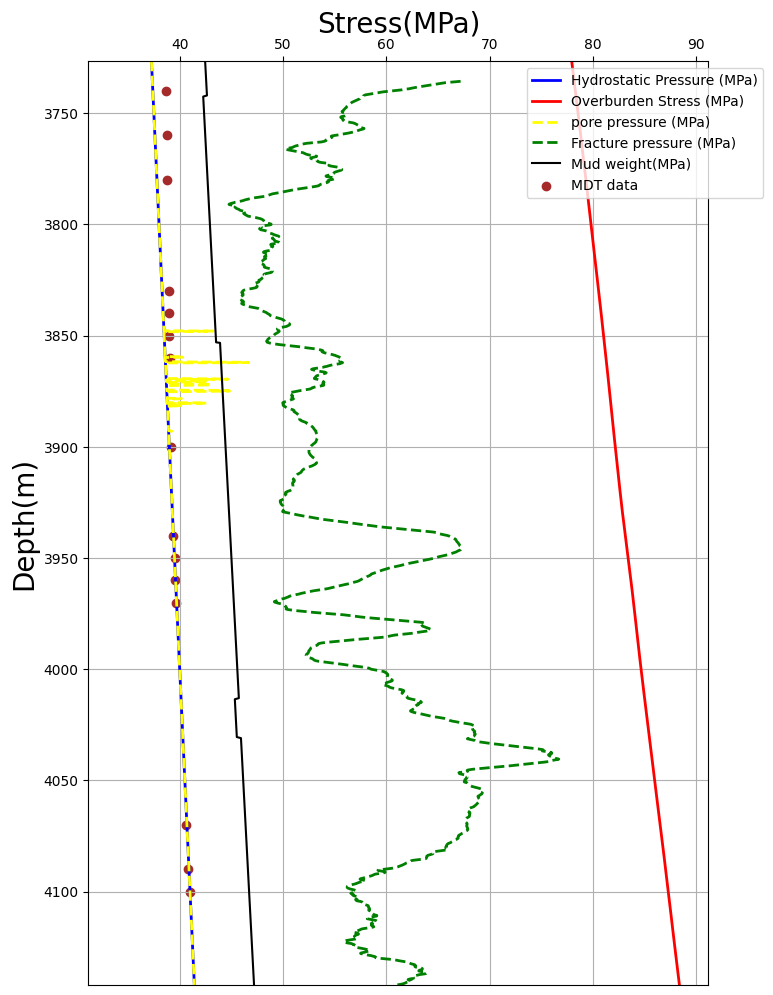

In [38]:
fig, axes = plt.subplots(figsize=(8, 12))
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

ax.plot(df_zoi.Phydro, df_zoi.DEPTH, color='blue', label='Hydrostatic Pressure (MPa)', linewidth=2)
ax.plot(df_zoi.Sv, df_zoi.DEPTH, color='red', label='Overburden Stress (MPa)', linewidth=2)
ax.plot(df_zoi.Pp1, df_zoi.DEPTH,linestyle='--', color='yellow', label='pore pressure (MPa)', linewidth=2)
ax.plot(df_zoi.frac_p_rolling, df_zoi.DEPTH,linestyle='--', color='green', label='Fracture pressure (MPa)', linewidth=2)
ax.plot(mud_df['DRLL_DENSIN_AVG_MPa'], mud_df['DEPTH'], color='k', label='Mud weight(MPa)')

ax.scatter(mdt.pressure,mdt.depth,color='brown',label='MDT data')
ax.set_ylim(4142,3726.5)
ax.set_xlabel('Stress(MPa)', fontsize=20)
ax.set_ylabel('Depth(m)', fontsize=20)
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.grid() 

fig.savefig("pp11.png", dpi=600)

**SHmax and Shmin Calculation**

In [39]:
# Define mechanical properties
E = df_zoi['E']*1000  # Young's Modulus in MPa
nu = df_zoi['v']  # Poisson's ratio
Eps = E / (1 - nu**2)  # Plane strain modulus
eps11 =0.0003   
eps22 =0.0001
B=1 
# Calculate effective vertical stress (σ_v)
sigmav = df_zoi['Sv'] - (B* df_zoi['Pp1'])    
# Calculate effective horizontal stresses based on provided formulas
sigma11 = nu / (1 - nu) * sigmav + Eps * eps11  + nu * Eps * eps22
sigma22 = nu / (1 - nu) * sigmav + Eps * eps22  + nu * Eps * eps11     
# horizontal stress stresses
df_zoi['SHmax'] = sigma11 +B* df_zoi['Pp1']  # Horizontal stress σ_Hmax
df_zoi['Shmin'] = sigma22 + B*df_zoi['Pp1']  # Horizontal stress σ_hmin
df_zoi.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8748\2440637073.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zoi['SHmax'] = sigma11 +B* df_zoi['Pp1']  # Horizontal stress σ_Hmax
C:\Users\user\AppData\Local\Temp\ipykernel_8748\2440637073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zoi['Shmin'] = sigma22 + B*df_zoi['Pp1']  # Horizontal stress σ_hmin


DEPTH    RHOB       GR     DTCO      DTSM    NPHI      PE     RESD  \
7453  3726.5000  2.3000      NaN      NaN       NaN     NaN     NaN      NaN   
7454  3726.6372  2.7423  59.4991  61.8411  170.3353  0.1195  5.8331  16.7065   
7455  3726.7896  2.6995  43.0537  51.7935  158.5045  0.1302  5.8255  17.9721   
7456  3726.9420  2.6840  37.0043  56.8889  146.0065  0.1587  5.7245  19.7639   
7457  3727.0944  2.6694  36.7555  57.6598  130.0320  0.1515  5.5769  17.5452   

        RESS  RES_MUD  ...  Static v      dz     Phydro         Sv  \
7453     NaN      NaN  ...       NaN  0.5000  37.265000  77.942828   
7454  3.1274   0.0240  ...  0.529090  0.1372  37.266372  77.946799   
7455  3.1737   0.0254  ...  0.545231  0.1524  37.267896  77.950913   
7456  4.3064   0.0270  ...  0.515507  0.1524  37.269420  77.955003   
7457  4.0337   0.0277  ...  0.482623  0.1524  37.270944  77.959071   

      Density_porosity        Pp1     Frac_p  frac_p_rolling      SHmax  \
7453         21.212121  37.265000        NaN             NaN        NaN   
7454          0.000000  37.266372  82.200872             NaN  77.664039   
7455          0.000000  37.267896  85.260701             NaN  81.532937   
7456          0.000000  37.269420  79.767920             NaN  79.136131   
7457          0.000000  37.270944  74.301837             NaN  77.877759   

          Shmin  
7453        NaN  
7454  74.151707  
7455  77.540022  
7456  74.457400  
7457  72.010934  

[5 rows x 32 columns]

C:\Users\user\AppData\Local\Temp\ipykernel_8748\3208291220.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)


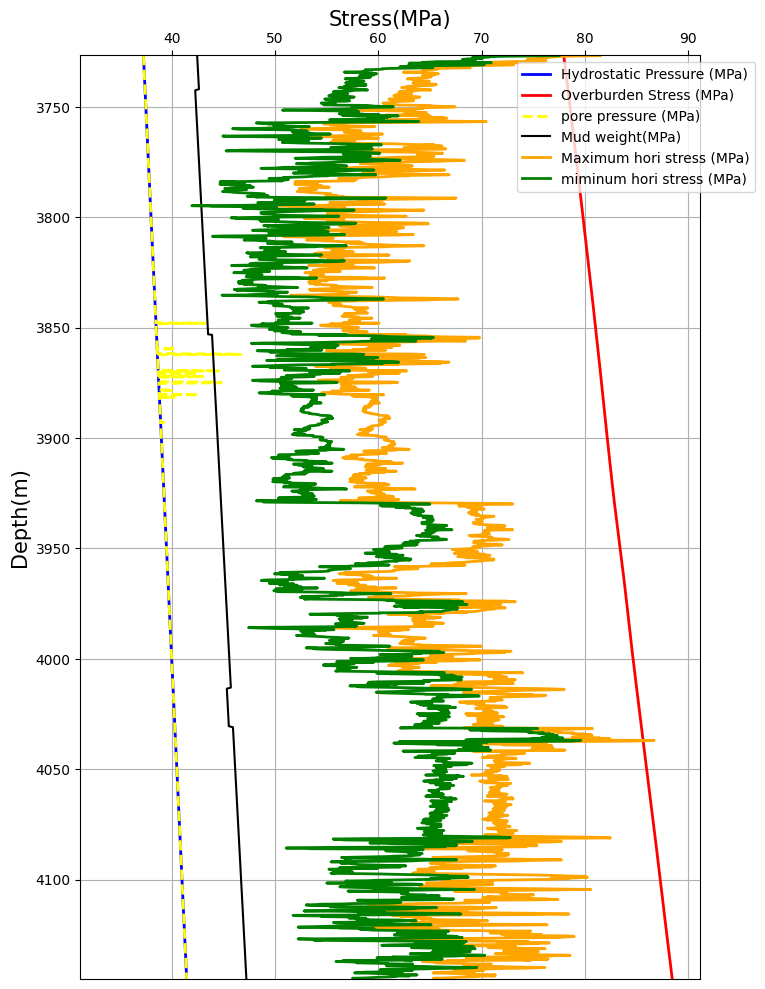

In [40]:
fig, axes = plt.subplots(figsize=(8, 12)) 
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
# Plotting stress values
ax.plot(df_zoi.Phydro, df_zoi.DEPTH, color='blue', label='Hydrostatic Pressure (MPa)', linewidth=2)
ax.plot(df_zoi.Sv, df_zoi.DEPTH, color='red', label='Overburden Stress (MPa)', linewidth=2)
ax.plot(df_zoi.Pp1, df_zoi.DEPTH,linestyle='--', color='yellow', label='pore pressure (MPa)', linewidth=2)
ax.plot(mud_df['DRLL_DENSIN_AVG_MPa'], mud_df['DEPTH'], color='k', label='Mud weight(MPa)')
ax.plot(df_zoi.SHmax, df_zoi.DEPTH, color='orange', label='Maximum hori stress (MPa)', linewidth=2)
ax.plot(df_zoi.Shmin, df_zoi.DEPTH, color='g', label='miminum hori stress (MPa)', linewidth=2)
ax.set_ylim(4145,3726.5)
ax.set_xlabel('Stress(MPa)', fontsize=15)
ax.set_ylabel('Depth(m)', fontsize=15)
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.grid() 

fig.savefig("1d model.png", dpi=600)